# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [11]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key


# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [6]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 597


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [12]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = city_url = url + "q=" + city + "&appid=" + weather_api_key

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ushuaia
Processing Record 2 of Set 1 | stanley
Processing Record 3 of Set 1 | usogorsk
Processing Record 4 of Set 1 | lubliniec
Processing Record 5 of Set 1 | bilibino
Processing Record 6 of Set 1 | punta arenas
Processing Record 7 of Set 1 | adamstown
Processing Record 8 of Set 1 | klyuchi
Processing Record 9 of Set 1 | smarhon
Processing Record 10 of Set 1 | saipan
Processing Record 11 of Set 1 | margaret river
Processing Record 12 of Set 1 | invercargill
Processing Record 13 of Set 1 | port-aux-francais
Processing Record 14 of Set 1 | grytviken
Processing Record 15 of Set 1 | el calafate
Processing Record 16 of Set 1 | longyearbyen
Processing Record 17 of Set 1 | constantia
Processing Record 18 of Set 1 | tiksi
Processing Record 19 of Set 1 | muar
Processing Record 20 of Set 1 | nova sintra
Processing Record 21 of Set 1 | karratha
Processing Record 22 of Set 1 | edinburgh of the seven seas
Pro

In [13]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          578
Lat           578
Lng           578
Max Temp      578
Humidity      578
Cloudiness    578
Wind Speed    578
Country       578
Date          578
dtype: int64

In [14]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ushuaia,-54.8000,-68.3000,280.01,94,95,1.39,AR,1736226908
1,stanley,54.8680,-1.6985,273.44,81,20,5.66,GB,1736226951
2,usogorsk,63.4106,48.6872,260.55,95,100,3.22,RU,1736227159
3,lubliniec,50.6690,18.6844,279.76,85,100,4.37,PL,1736227161
4,bilibino,68.0546,166.4372,237.75,88,10,0.45,RU,1736227162


In [15]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [16]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ushuaia,-54.8000,-68.3000,280.01,94,95,1.39,AR,1736226908
1,stanley,54.8680,-1.6985,273.44,81,20,5.66,GB,1736226951
2,usogorsk,63.4106,48.6872,260.55,95,100,3.22,RU,1736227159
3,lubliniec,50.6690,18.6844,279.76,85,100,4.37,PL,1736227161
4,bilibino,68.0546,166.4372,237.75,88,10,0.45,RU,1736227162


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

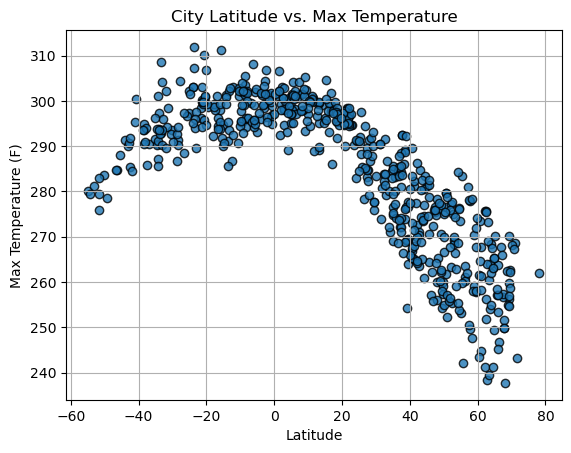

In [18]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)


# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

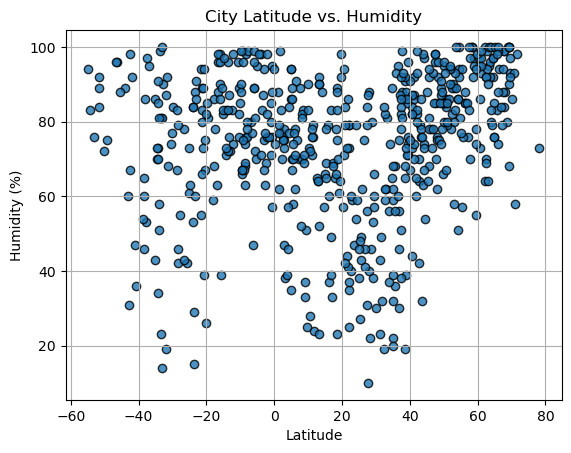

In [19]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

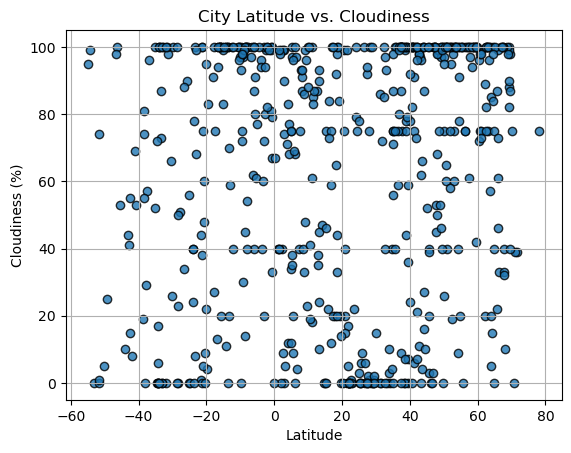

In [20]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

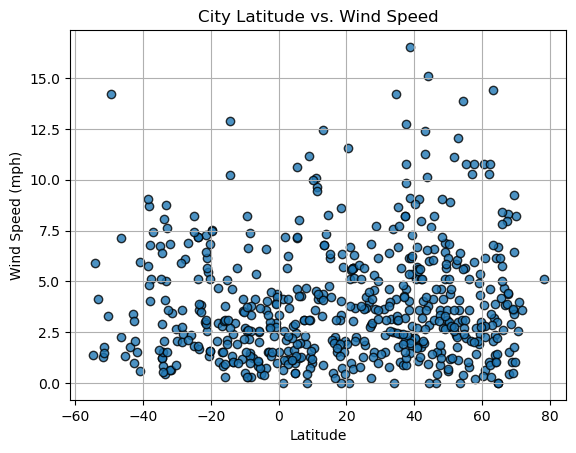

In [22]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,ginir,7.1333,40.7000,22.08,47,100,1.53,ET,1718607742
3,bam,29.1060,58.3570,38.66,10,0,7.82,IR,1718607769
4,marrakesh,31.6315,-8.0083,17.04,72,0,3.09,MA,1718607770
6,machico,32.7000,-16.7667,20.40,81,40,5.66,PT,1718607772
8,howrah,22.5892,88.3103,36.00,67,40,6.17,IN,1718607544


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,kerikeri,-35.2268,173.9474,14.39,90,100,0.98,NZ,1718607765
2,margaret river,-33.9500,115.0667,15.44,67,60,3.76,AU,1718607768
5,waitangi,-43.9535,-176.5597,12.68,98,100,3.13,NZ,1718607771
7,port lincoln,-34.7333,135.8667,13.27,67,100,3.38,AU,1718607773
9,leava,-14.3000,-178.1667,28.10,85,8,8.07,WF,1718607775


###  Temperature vs. Latitude Linear Regression Plot

The r^2-value is: 0.3940754297489331


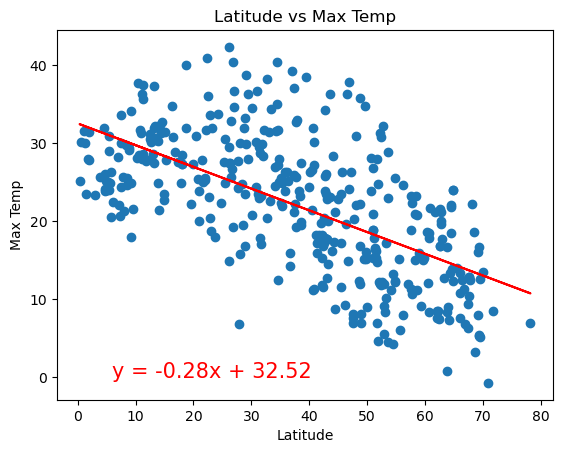

In [15]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE

The r^2-value is: 0.6720220238897325


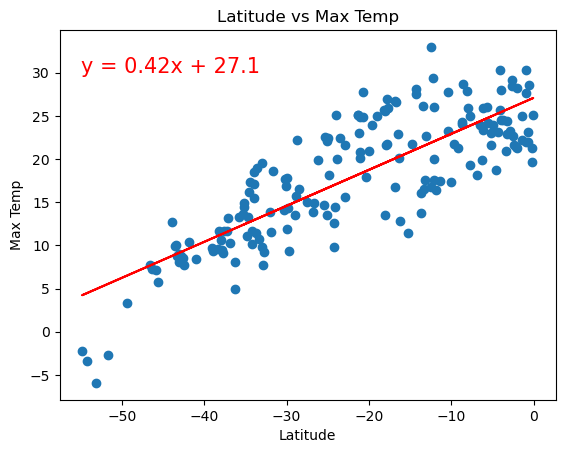

In [16]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r^2-value is: 0.007659599322853922


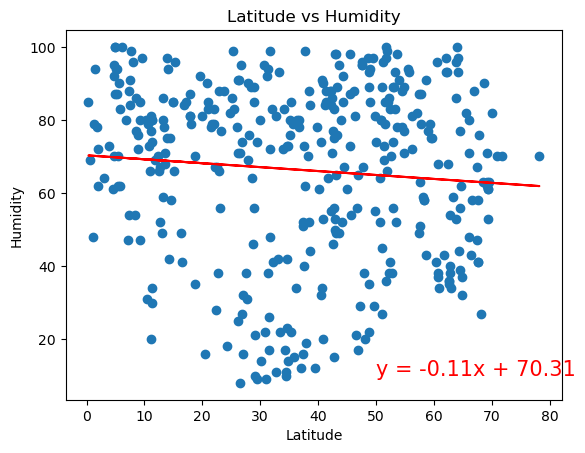

In [17]:
# Northern Hemisphere
# YOUR CODE HERE

The r^2-value is: 0.00014367159540169783


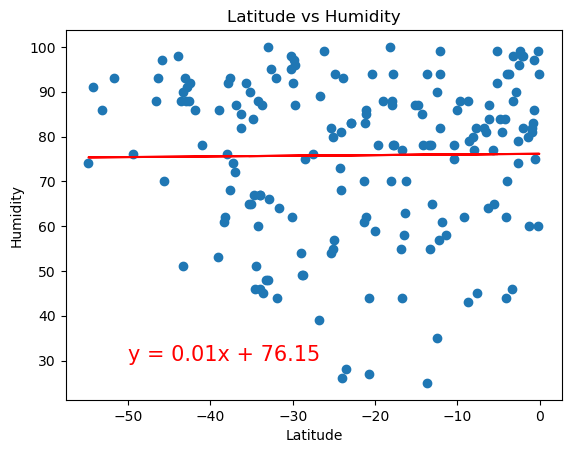

In [23]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r^2-value is: 0.006456908379763574


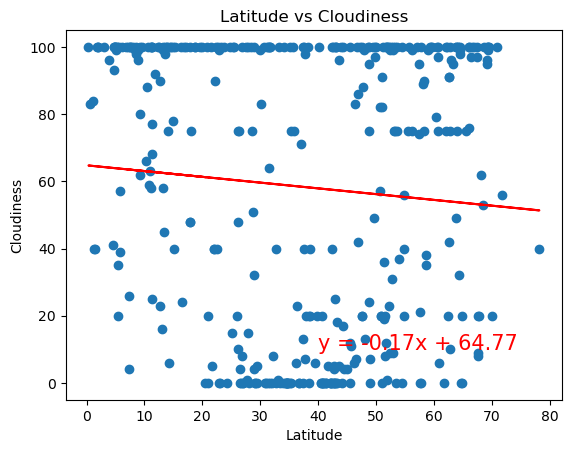

In [19]:
# Northern Hemisphere
# YOUR CODE HERE

The r^2-value is: 0.018616831531634456


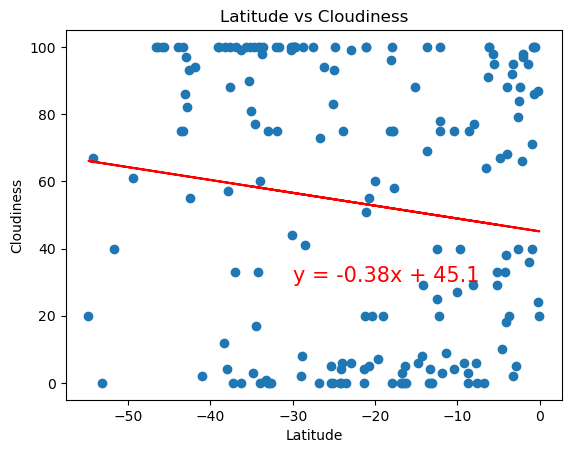

In [20]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r^2-value is: 0.0017236249523139959


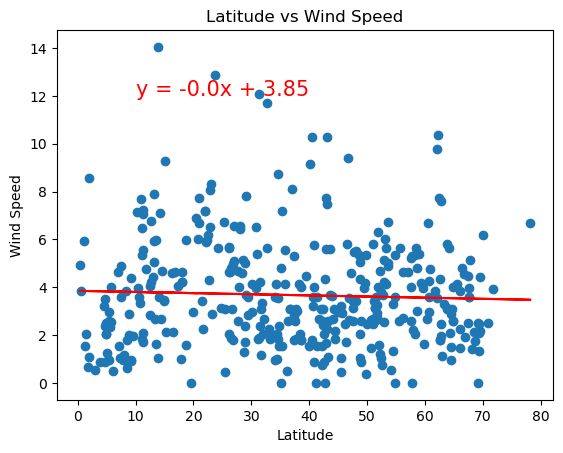

In [21]:
# Northern Hemisphere
# YOUR CODE HERE

The r^2-value is: 0.06495869418886388


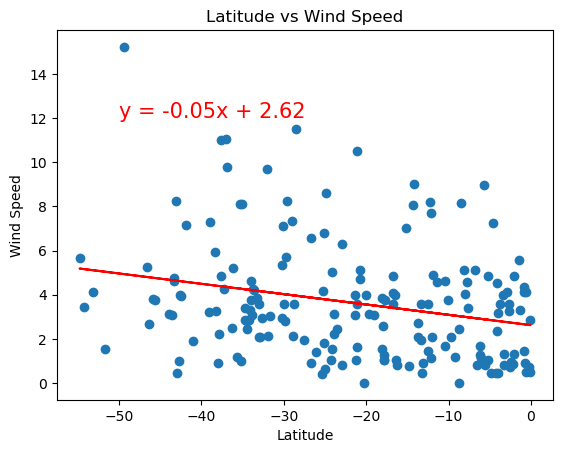

In [22]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE